# Section 1: Decision tree for discretization

In [2]:
# Discretization example

# We will use the titanic dataset

# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset. We will only load 4 features.
# The class is "Survived" (0 or 1)
data = pd.read_csv('./data/titanic.csv',usecols =['Name','Sex','Age','Fare','Survived'])

# Ignore rows with null values
data = data.dropna()

# Keep data where Age >= 1
data = data.loc[data['Age'] >= 1]
data.head()

,Survived,Name,Sex,Age,Fare
0,0,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,"Allen, Mr. William Henry",male,35.0,8.0500


In [3]:
# We want to discretize "Age"
# We will follow a supervised method for discretization
# So, we will consider the class "Survived" to discretize "Age"


# This means that we will use "Age" to predict "Survived"

# Create a model with max depth = 2
tree_model = DecisionTreeClassifier(max_depth=2)

# Fit only using Age data and "Survived"  (i.e. X=["Age"], y=["Survived"])
tree_model.fit(data.Age.to_frame(), data.Survived)

# And now that we have learned the tree, use it to predict the class, given the Age as feature 
data['Age_DT']=tree_model.predict_proba(data.Age.to_frame())[:,1] 
data.head(10)

# The "Age_DT" column contains the probability of the data point belonging to the corresponding class

,Survived,Name,Sex,Age,Fare,Age_DT
0,0,"Braund, Mr. Owen Harris",male,22.0,7.2500,0.391437
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,0.391437
2,1,"Heikkinen, Miss. Laina",female,26.0,7.9250,0.391437
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0.391437
4,0,"Allen, Mr. William Henry",male,35.0,8.0500,0.391437
6,0,"McCarthy, Mr. Timothy J",male,54.0,51.8625,0.391437
7,0,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,0.470588
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,0.391437
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,0.391437
10,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,0.782609


In [4]:
# Check the unique values of the Age_DT attribute
data.Age_DT.unique()

array([0.39143731, 0.47058824, 0.7826087 , 0.07692308])

In [1]:
# We have 4 unique values of probabilities.
# The tree depth 2 makes 2*2 binary splits, thus generating 4 buckets.
# That is why we see 4 different probabilities in the output above.

In [6]:
# Check the number of samples per probabilistic bucket
data.groupby(['Age_DT'])['Survived'].count()

Age_DT
0.076923     13
0.391437    654
0.470588     17
0.782609     23
Name: Survived, dtype: int64

In [7]:
# Check the age limits for each bucket
# i.e. let's see the boundaries of each bucket
pd.concat( [data.groupby(['Age_DT'])['Age'].min(),
            data.groupby(['Age_DT'])['Age'].max()], axis=1)

,Age,Age
Age_DT,,
0.076923,64.0,80.0
0.391437,7.0,63.0
0.470588,1.0,2.0
0.782609,3.0,6.0


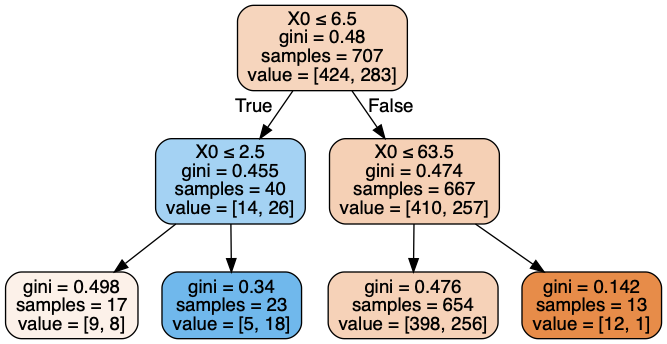

In [8]:
# Visualize the tree to understand why all the above happened

# Import some libs to graphically display the tree
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

In [9]:
# Examine the leaf nodes to see the number of samples
# and validate the learned probabilities that are used to discretize "Age"

# Section 2: Decision tree for classification

In [10]:
# We will use the iris dataset. 
# This is perhaps the best known database to be found in the pattern recognition literature. 

# The task is to classify the Iris plant based on the 4 features:
# sepal length in cm
# sepal width in cm
# petal length in cm
# petal width in cm

# To one of these classes:
# -- Iris Setosa
# -- Iris Versicolour
# -- Iris Virginica

# Import libs
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from helper_funcs import plot_decision_regions

# Load dataset (this comes directly in  sklearn.datasets)
# We will only load 2 features: petal length and petal width
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f'X shape: {X.shape}')
print('Class labels:', np.unique(y))


X shape: (150, 2)
Class labels: [0 1 2]


In [11]:
# Split the data to training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [12]:
# Fit decision tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/izavits/workspace/msc_datascience/helpe

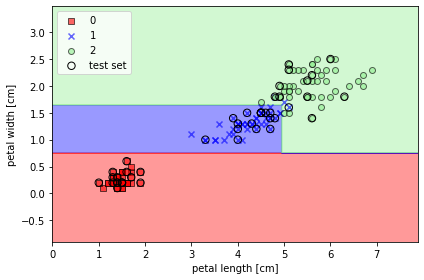

In [13]:
# Plot data in a 2D space along with the tree decisions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


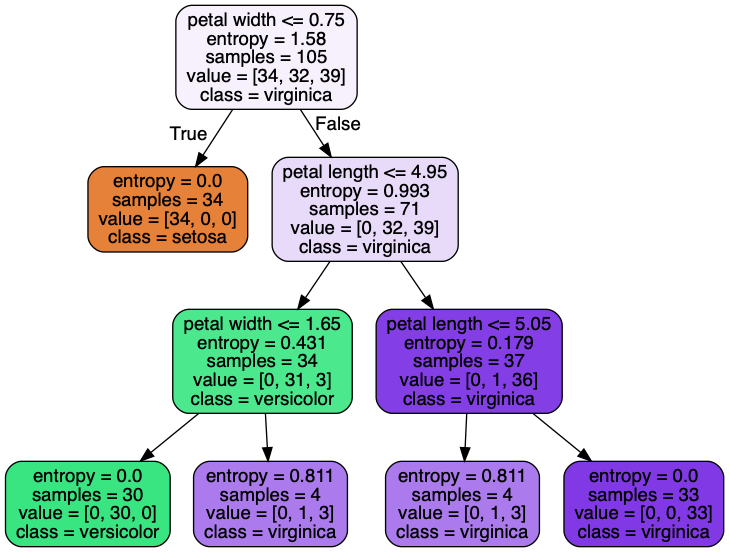

In [14]:
# Visualize tree

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=['petal length', 'petal width'],  
    class_names=['setosa', 'versicolor', 'virginica'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [15]:
# RULES EXTRACTION

from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=['petal length', 'petal width'])
print(tree_rules)

|--- petal width <= 0.75
|   |--- class: 0
|--- petal width >  0.75
|   |--- petal length <= 4.95
|   |   |--- petal width <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width >  1.65
|   |   |   |--- class: 2
|   |--- petal length >  4.95
|   |   |--- petal length <= 5.05
|   |   |   |--- class: 2
|   |   |--- petal length >  5.05
|   |   |   |--- class: 2



In [16]:
# 5 Rules:

# Just follow the paths:
# R1: IF petal width <= 0.75 THEN class=0 (setosa)
# R2: IF petal width > 0.75 AND petal length <= 4.95 AND petal width <= 1.65  THEN class = 1 (versicolor)
# R3: IF petal width > 0.75 AND petal length <= 4.95 AND petal width >  1.65  THEN class = 2 (virginica)
# R4: IF petal width > 0.75 AND petal length >  4.95 AND petal length <= 5.05 THEN class = 2 (virginica)
# R5: IF petal width > 0.75 AND petal length >  4.95 AND petal length > 5.05  THEN class = 2 (virginica)